<div style="text-align:center;">
  <a href="https://github.com/victoresende19" rel="some text">
    <img src="https://www.istoedinheiro.com.br/wp-content/uploads/sites/17/2021/03/aquecimento-e1615957490373.jpg" alt="Foo" />
  </a>
    
  <h2 style="text-align:center">Análise de dados meteorológicos</h2>
  <p style="text-align:center;font-size:13px;"></p>

  <h2 style="text-align:center">Victor Augusto Souza Resende</h2>
  <p style="text-align:center;font-size:13px;">Autor</p>
</div>


## Sumário

    
- [1. Contexto](#1)<br><br>
    
- [2. Análise exploratória INMET](#2) <br>
    * [2.1 Precipitação](#21)<br>
    * [2.2 Temperatura máxima](#22)<br>
    * [2.3 Temperatura mínima](#23)<br>
    * [2.4 Temperatura média](#24)<br><br>
    
- [3. Análise exploratória INPE](#2) <br>
    * [3.1 Frequência incêndios](#31) <br><br>
    
- [4. Manipulação tabelas INMET e INPE](#4) <br>
    * [4.1 Merge das tabelas](#41)<br><br>
    
- [5. Modelagem](#5) <br>
    * [5.1 Padronização das variáveis](#41)<br>
    * [5.1 Random Forest](#41)<br><br>


In [1]:
!pip install xgboost -q
!pip install tensorflow -q


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.tree import plot_tree

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

#from sklearn.externals import joblib
import joblib

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import tensorflow as tf

sns.set_style("whitegrid")

In [3]:
tf.__version__

'2.12.0'

# 1 - Contexto <a id="1"></a>

Com o passar dos anos e o avanço da tecnologia, houve a criação e implementação de diversos sensores e sistemas em locais que correm riscos de desastres naturais para a verificação do perigo eminente e coleta de tais dados. Dessa forma, uma vasta quantidade de dados é gerada diariamente, principalmente quando há situações de estiagem, secas ou enchentes, dos quais são úteis para planos econômicos e sociais. Consequentemente, diversas técnicas de tratamento dos dados, modelagem e inferência estatística podem auxiliar na prevenção do impacto de determinado desastre natural caso ocorra.

In [4]:
inmet = pd.read_csv('../Data/inmet_teste3.csv', sep = ';', decimal = ',', parse_dates = ['Data Medicao'])

# 2 - Análise exploratória INMET <a id="2"></a>

In [5]:
inmet.head()

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
0,1992-01-31,171.6,24.758065,20.575484,18.003226
1,1992-02-29,313.8,24.444828,19.995172,17.131034
2,1992-03-31,135.8,25.706452,20.831613,17.577419
3,1992-04-30,297.9,26.386667,21.066667,17.550000
4,1992-05-31,4.5,26.374194,20.685806,16.112903


In [6]:
inmet.describe()

,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
count,372.000000,372.000000,372.000000,372.000000
mean,122.013978,27.105747,21.408394,16.993051
std,118.072568,1.578804,1.397325,1.771593
min,0.000000,23.383871,17.681290,11.903226
25%,9.850000,26.006452,20.535968,15.420968
50%,92.400000,26.877043,21.498988,17.763334
75%,204.150000,27.943199,22.263467,18.322769
max,526.400000,33.000000,25.623226,19.729032


In [7]:
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data Medicao              372 non-null    datetime64[ns]
 1   PRECIPITACAO              372 non-null    float64       
 2   TEMPERATURA_MAXIMA_MEDIA  372 non-null    float64       
 3   TEMPERATURA_MEDIA         372 non-null    float64       
 4   TEMPERATURA_MINIMA_MEDIA  372 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.7 KB


In [8]:
inmet.shape

(372, 5)

In [9]:
round((inmet.isna().sum()/len(inmet)), 2)

Data Medicao                0.0
PRECIPITACAO                0.0
TEMPERATURA_MAXIMA_MEDIA    0.0
TEMPERATURA_MEDIA           0.0
TEMPERATURA_MINIMA_MEDIA    0.0
dtype: float64

# 2.1 - Precipitação <a id="21"></a>

In [10]:
inmet[inmet['PRECIPITACAO'] == inmet['PRECIPITACAO'].max()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
177,2006-10-31,526.4,26.532258,21.237419,18.106452


In [11]:
len(inmet[inmet['PRECIPITACAO'] == inmet['PRECIPITACAO'].min()])

57

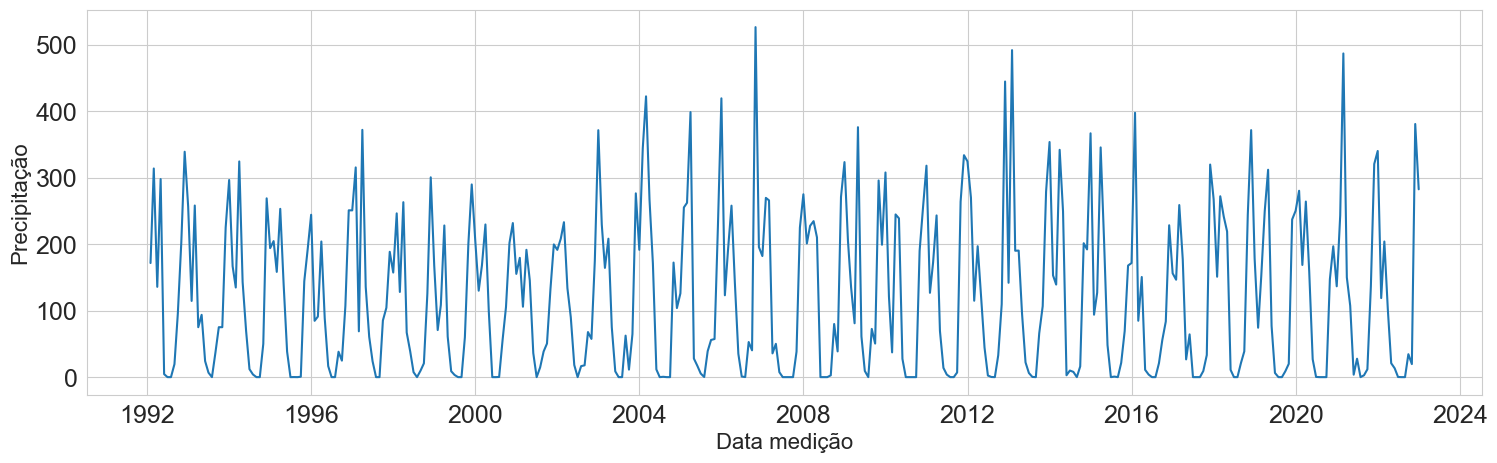

In [12]:
figure(figsize=(18,5))
sns.lineplot(data=inmet, x="Data Medicao", y="PRECIPITACAO")
plt.xlabel('Data medição', fontsize=16)
plt.ylabel('Precipitação', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('../../Documentação/precipitacaoTimeSeries.png', dpi=300)

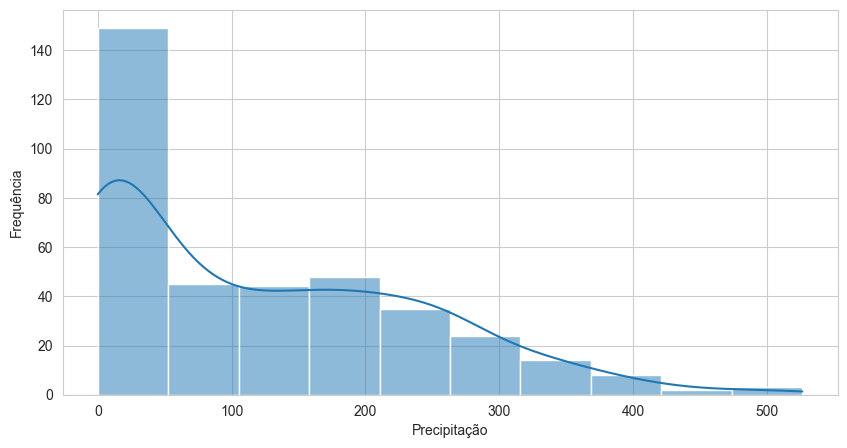

In [13]:
figure(figsize=(10,5))
sns.histplot(data=inmet, x="PRECIPITACAO", kde=True)
plt.xlabel('Precipitação')
plt.ylabel('Frequência')
plt.savefig('../../Documentação/precipitacaoHist.png', dpi=300, bbox_inches='tight')

In [14]:
import numpy as np
from scipy.stats import gamma, kstest

# Parâmetros da distribuição gamma (estimados a partir dos dados de precipitação)
shape, loc, scale = gamma.fit(inmet['PRECIPITACAO'])

# Teste de Kolmogorov-Smirnov
p_valor, ks_statistic = kstest(inmet['PRECIPITACAO'], 'gamma', args=(shape, loc, scale))

print(f"Valor p: {p_valor:.4f}")

Valor p: 0.2365


# 2.2 - Temperatura máxima <a id="22"></a>

In [15]:
inmet[inmet['TEMPERATURA_MAXIMA_MEDIA'] == inmet['TEMPERATURA_MAXIMA_MEDIA'].max()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
285,2015-10-31,69.4,33.0,25.623226,19.670968


In [16]:
inmet[inmet['TEMPERATURA_MAXIMA_MEDIA'] == inmet['TEMPERATURA_MAXIMA_MEDIA'].min()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
306,2017-07-31,0.0,23.383871,17.68129,12.770968


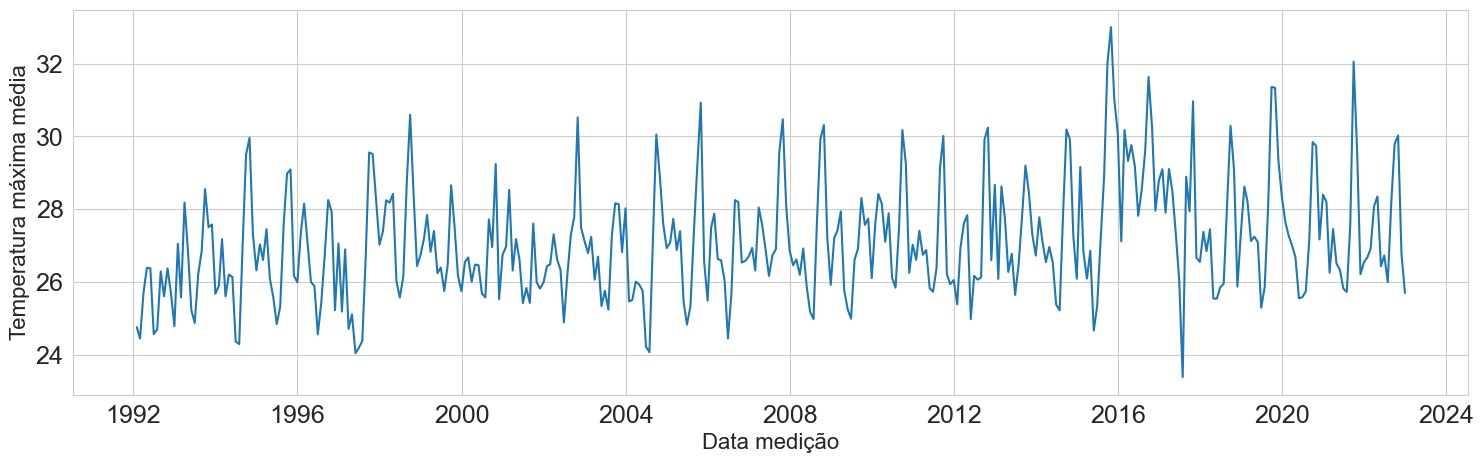

In [17]:
figure(figsize=(18,5))
sns.lineplot(data=inmet, x="Data Medicao", y="TEMPERATURA_MAXIMA_MEDIA")
plt.xlabel('Data medição', fontsize=16)
plt.ylabel('Temperatura máxima média', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('../../Documentação/temperaturaMaximaTimeSeries.png', dpi=300)

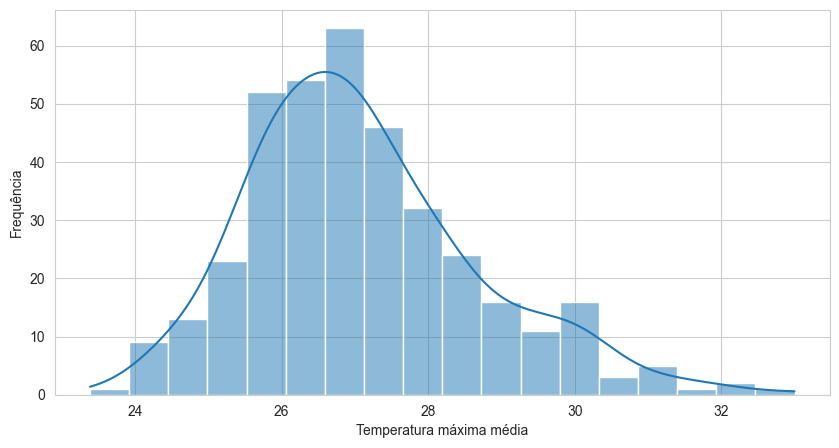

In [18]:
figure(figsize=(10,5))
sns.histplot(data=inmet, x="TEMPERATURA_MAXIMA_MEDIA", kde=True)
plt.xlabel('Temperatura máxima média')
plt.ylabel('Frequência')
plt.savefig('../../Documentação/temperaturaMaximaHist.png', dpi=300, bbox_inches='tight')

In [19]:
format(shapiro(inmet['TEMPERATURA_MAXIMA_MEDIA'].values)[1], '.8f')

'0.00000016'

# 2.3 - Temperatura mínima <a id="23"></a>

In [20]:
inmet[inmet['TEMPERATURA_MINIMA_MEDIA'] == inmet['TEMPERATURA_MINIMA_MEDIA'].max()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
165,2005-10-31,57.3,30.925806,24.767097,19.729032


In [21]:
inmet[inmet['TEMPERATURA_MINIMA_MEDIA'] == inmet['TEMPERATURA_MINIMA_MEDIA'].min()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
354,2021-07-31,0.0,25.723333,18.35,11.903226


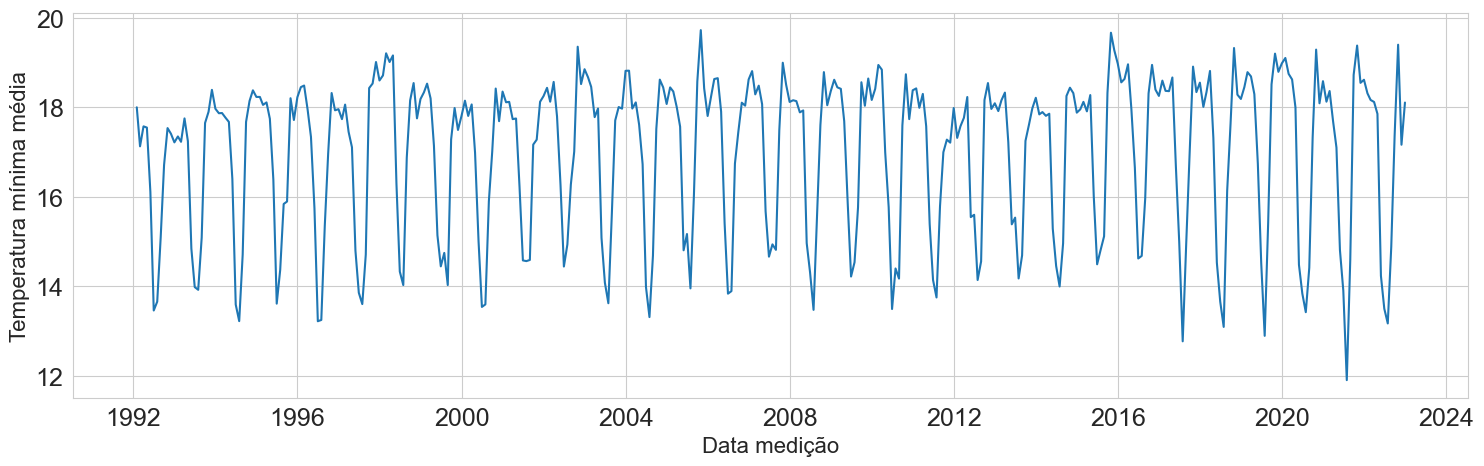

In [22]:
figure(figsize=(18,5))
sns.lineplot(data=inmet, x="Data Medicao", y="TEMPERATURA_MINIMA_MEDIA")
plt.xlabel('Data medição', fontsize=16)
plt.ylabel('Temperatura mínima média', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('../../Documentação/temperaturaMinimaTimeSeries.png', dpi=300)

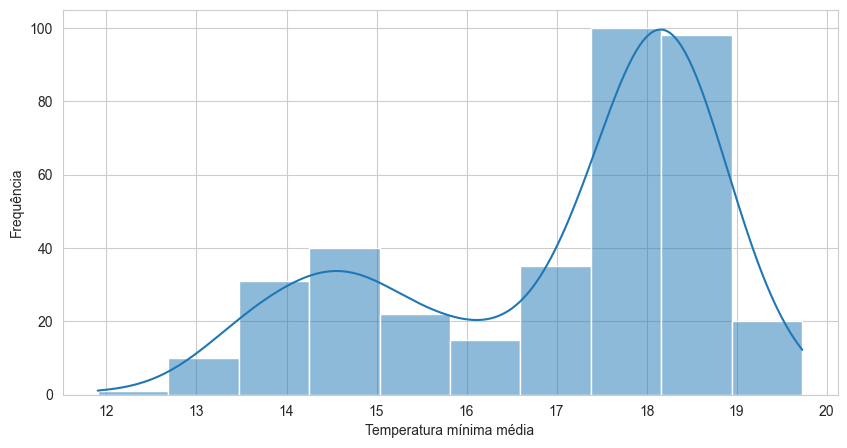

In [23]:
figure(figsize=(10,5))
sns.histplot(data=inmet, x="TEMPERATURA_MINIMA_MEDIA", kde=True)
plt.xlabel('Temperatura mínima média')
plt.ylabel('Frequência')
plt.savefig('../../Documentação/temperaturaMinimaHist.png', dpi=300, bbox_inches='tight')

In [24]:
format(shapiro(inmet['TEMPERATURA_MINIMA_MEDIA'].values)[1], '.18f')

'0.000000000000000104'

In [25]:
from scipy.stats import normaltest

format(normaltest(inmet['TEMPERATURA_MINIMA_MEDIA'].values)[1], '.18f')

'0.000000000019451306'

# 2.4 - Temperatura média <a id="24"></a>

In [26]:
inmet[inmet['TEMPERATURA_MEDIA'] == inmet['TEMPERATURA_MEDIA'].max()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
285,2015-10-31,69.4,33.0,25.623226,19.670968


In [27]:
inmet[inmet['TEMPERATURA_MEDIA'] == inmet['TEMPERATURA_MEDIA'].min()]

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA
306,2017-07-31,0.0,23.383871,17.68129,12.770968


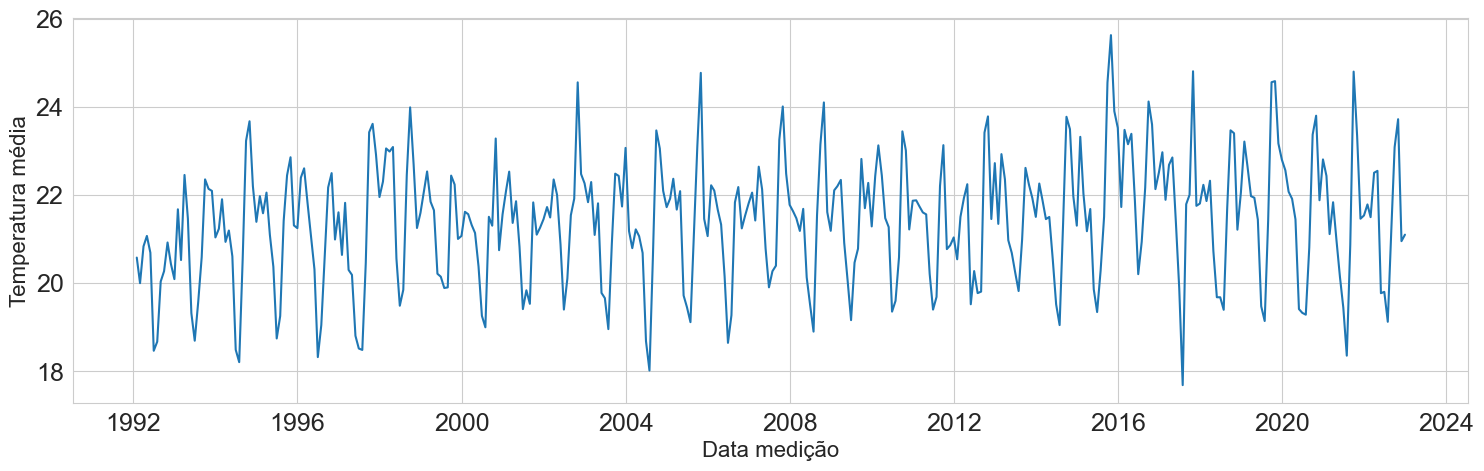

In [28]:
figure(figsize=(18,5))
sns.lineplot(data=inmet, x="Data Medicao", y="TEMPERATURA_MEDIA")
plt.xlabel('Data medição', fontsize=16)
plt.ylabel('Temperatura média', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('../../Documentação/temperaturaMediaTimeSeries.png', dpi=300)

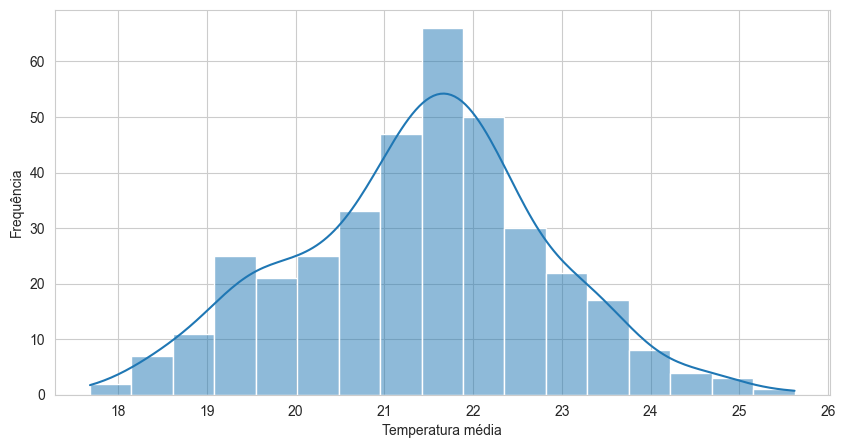

In [29]:
figure(figsize=(10,5))
sns.histplot(data=inmet, x="TEMPERATURA_MEDIA", kde=True)
plt.xlabel('Temperatura média')
plt.ylabel('Frequência')
plt.savefig('../../Documentação/temperaturaMediaHist.png', dpi=300, bbox_inches='tight')

In [30]:
format(shapiro(inmet['TEMPERATURA_MEDIA'].values)[1], '.18f')

'0.099493868649005890'

In [31]:
format(normaltest(inmet['TEMPERATURA_MEDIA'].values)[1], '.18f')

'0.798099513690802009'

# 2.5 - Correlação <a id="25"></a>

C:\Users\User\AppData\Local\Temp\ipykernel_13748\3692325057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(inmet.corr(), annot=True)


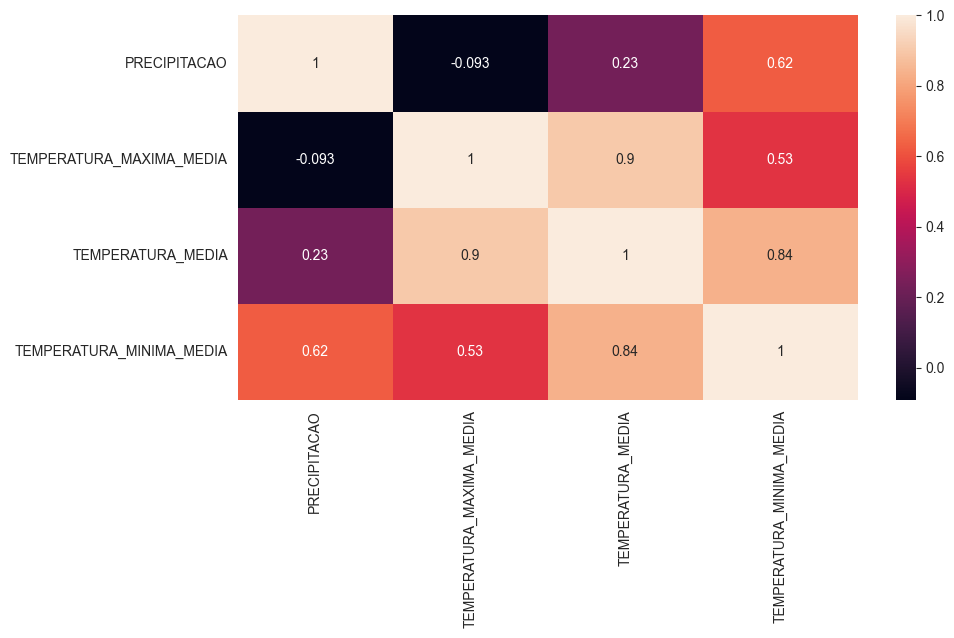

In [32]:
figure(figsize=(10,5))
sns.heatmap(inmet.corr(), annot=True)
plt.savefig('../../Documentação/correlacao', dpi=300, bbox_inches='tight')

# 2.6 - Outliers <a id="26"></a>

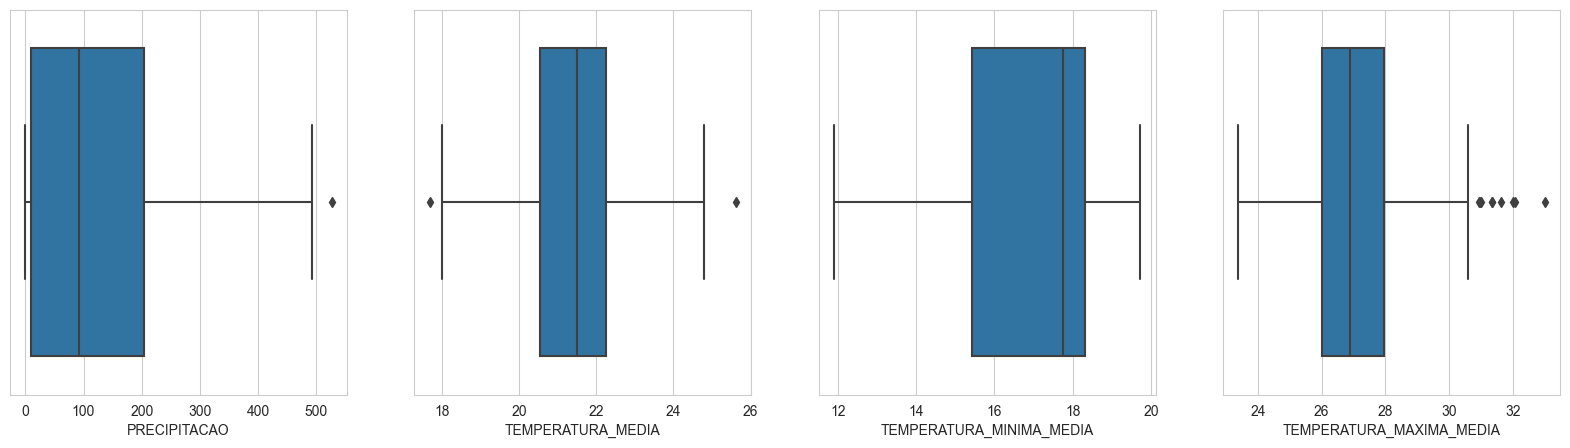

In [33]:
fig, axs = plt.subplots(ncols=4, figsize=(20,5))

# Plotagem dos boxplots
sns.boxplot(x=inmet['PRECIPITACAO'], ax=axs[0])
sns.boxplot(x=inmet['TEMPERATURA_MEDIA'], ax=axs[1])
sns.boxplot(x=inmet['TEMPERATURA_MINIMA_MEDIA'], ax=axs[2])
sns.boxplot(x=inmet['TEMPERATURA_MAXIMA_MEDIA'], ax=axs[3])
plt.savefig('../../Documentação/boxplot', dpi=300, bbox_inches='tight')
plt.show()

# 3 - Análise exploratória INPE <a id="3"></a>

In [34]:
# Carrega o arquivo CSV em um DataFrame
inpe = pd.read_csv('../Data/historico_estado_distrito_federal.csv', sep=',')
inpe = inpe.drop(columns=inpe.columns[-1])

# Transforma o DataFrame em um formato "tidy"
inpe = inpe.melt(id_vars=['Unnamed: 0'], var_name='mes', value_name='frequencia')

# Renomeia a coluna "Unnamed: 0" para "ano"
inpe = inpe.rename(columns={'Unnamed: 0': 'ano'})

inpe.frequencia = inpe.frequencia.replace('-', 0).astype('int64')

In [35]:
# Exibe o DataFrame resultante
inpe.sort_values(by = ['ano']).reset_index(drop=True).head()

,ano,mes,frequencia
0,1998,Janeiro,0
1,1998,Novembro,0
2,1998,Março,0
3,1998,Fevereiro,0
4,1998,Dezembro,0


In [36]:
inpe.describe()

,ano,frequencia
count,312.000000,312.000000
mean,2010.500000,16.141026
std,7.512048,31.063973
min,1998.000000,0.000000
25%,2004.000000,0.000000
50%,2010.500000,2.000000
75%,2017.000000,17.000000
max,2023.000000,204.000000


In [37]:
inpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ano         312 non-null    int64 
 1   mes         312 non-null    object
 2   frequencia  312 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.4+ KB


In [38]:
inpe.shape

(312, 3)

In [39]:
round((inpe.isna().sum()/len(inpe)), 2)

ano           0.0
mes           0.0
frequencia    0.0
dtype: float64

# 3.1 - Frequência incêndios <a id="31"></a>

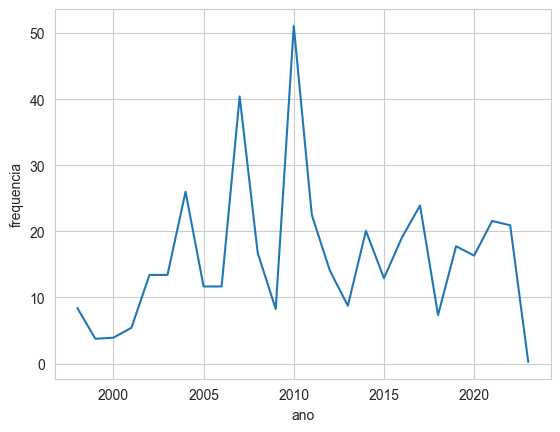

In [40]:
sns.lineplot(data=inpe, x="ano", y="frequencia", errorbar=None, markers=True, dashes=False)
plt.savefig('../../Documentação/fireWild', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
inpe[inpe.mes == 'Janeiro'].frequencia.mean()

0.46153846153846156

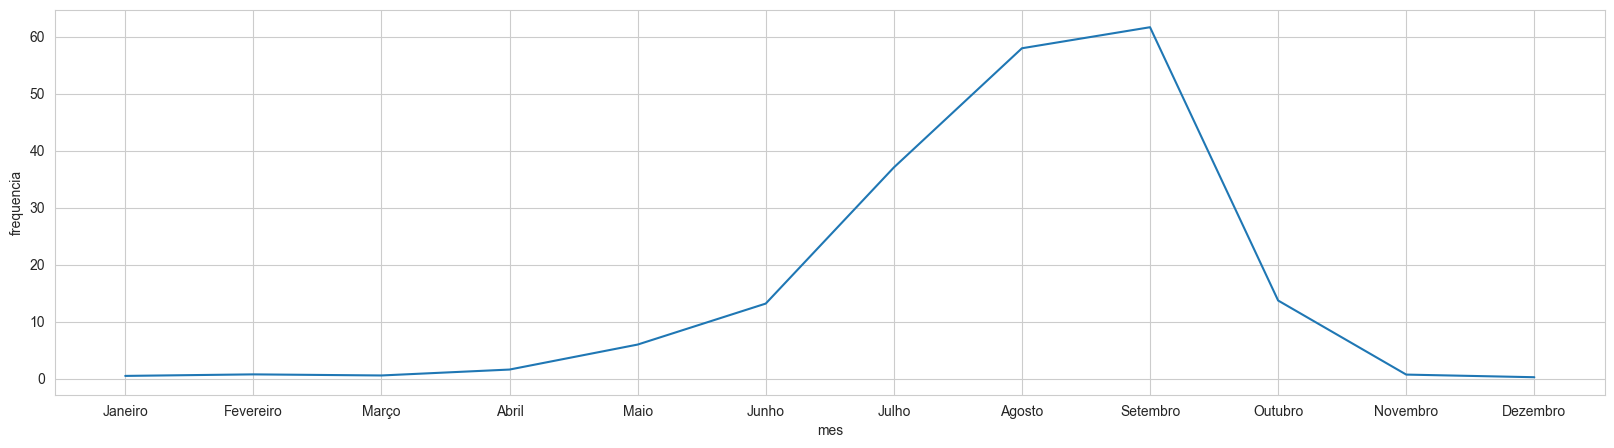

In [42]:
figure(figsize=(20,5))
sns.lineplot(x = inpe.mes, y=inpe.frequencia, errorbar=None, markers=True, dashes=False)
plt.savefig('../../Documentação/fireWildMonth', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=df_final.mes, y=df_final.PRECIPITACAO, errorbar=None,
             markers=True, dashes=False, label='Precipitação')
sns.lineplot(x=inpe.mes, y=inpe.frequencia, errorbar=None,
             markers=True, dashes=False, label='Quantidade de Incêndios')
plt.legend()
plt.savefig('../../Documentação/Precipitacao_and_fireWild_Month',
            dpi=300, bbox_inches='tight')
plt.show()

# 4 - Manipulação tabelas INMET e INPE <a id="4"></a>

Tabela INMET com os índices SPI e SPEI calculados.

In [43]:
inmet = pd.read_csv('../Data/inmet_SPI_SPEI_indexes.csv')

# converte a coluna 'date' para o tipo datetime
inmet['Data Medicao'] = pd.to_datetime(inmet['Data Medicao'], format='%m/%d/%Y')

# cria a nova coluna no formato desejado
inmet['Date'] = inmet['Data Medicao'].dt.strftime('%m/%Y')

In [44]:
inpe['mes_numero'] = inpe['mes'].replace({
        'Janeiro': 1,
        'Fevereiro': 2,
        'Março': 3,
        'Abril':4,
         'Maio':5,
         'Junho':6,
         'Julho':7,
         'Agosto':8,
         'Setembro':9,
         'Outubro':10,
         'Novembro':11,
         'Dezembro':12
        }, regex=True)

inpe['mes_numero'] = inpe['mes_numero'].astype(int)
inpe['ano'] = inpe['ano'].astype(str)

inpe['Date'] = pd.to_datetime(inpe['mes_numero'].astype(str).str.cat(inpe["ano"], sep = "/"), format='%m/%Y')
inpe['Date'] = inpe['Date'].dt.strftime('%m/%Y')

# 4.1 - Merge das tabelas <a id="41"></a>

In [45]:
df_final = inmet.merge(inpe, on = 'Date')
#df_final = df_final.drop(columns=['PET', 'BAL'])
df_final = df_final.rename(columns={'frequencia':'frequencia_incendios'})
df_final.head()

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA,PET,BAL,SPI6,SPEI3,Date,ano,mes,frequencia_incendios,mes_numero
0,1998-01-31,246.3,27.396774,22.299355,18.716129,143.629882,102.670118,-0.645232,-0.877155,01/1998,1998,Janeiro,0,1
1,1998-02-28,128.1,28.242857,23.052143,19.210714,130.768556,-2.668556,-0.883087,-0.787776,02/1998,1998,Fevereiro,0,2
2,1998-03-31,263.1,28.177419,22.981935,19.016129,135.845003,127.254997,-0.939384,0.306159,03/1998,1998,Março,0,3
3,1998-04-30,67.0,28.416667,23.084667,19.163333,116.925414,-49.925414,-0.895999,-0.649763,04/1998,1998,Abril,0,4
4,1998-05-31,38.8,26.019355,20.552903,16.303226,100.921859,-62.121859,-0.547965,-0.195612,05/1998,1998,Maio,0,5


In [46]:
df_final.to_csv('../Data/inmet_inpe.csv')


In [47]:
intervalos = [-float('inf'), -2.0, -1.5, -1.0, -0.99, 1.0, 1.5, 2.0, float('inf')]
categorias = ['Extremamente seco', 'Severamente seco', 'Moderadamente seco', 'Próximo do normal',
              'Moderadamente úmido', 'Muito úmido', 'Extremamente úmido', 'Indefinido']
df['SPEI3_categorias'] = pd.cut(df['SPEI3'], bins=intervalos, labels=categorias)
df['SPI6_categorias'] = pd.cut(df['SPI6'], bins=intervalos, labels=categorias)

,Data Medicao,PRECIPITACAO,TEMPERATURA_MAXIMA_MEDIA,TEMPERATURA_MEDIA,TEMPERATURA_MINIMA_MEDIA,PET,BAL,SPI6,SPEI3,Date,ano,mes,frequencia_incendios,mes_numero
7,1998-08-31,9.7,28.722581,22.444516,16.877419,124.621605,-114.921605,-0.000531,-0.194895,08/1998,1998,Agosto,48,8
19,1999-08-31,0.0,26.483871,19.899355,14.029032,119.782715,-119.782715,-0.641128,-0.572021,08/1999,1999,Agosto,15,8
31,2000-08-31,56.3,27.716129,21.501290,15.903226,121.416142,-65.116142,-0.008199,1.195131,08/2000,2000,Agosto,9,8
43,2001-08-31,38.5,25.422581,19.526452,14.590323,110.974251,-72.474251,0.270226,1.484620,08/2001,2001,Agosto,25,8
55,2002-08-31,17.8,27.293548,21.537419,16.277419,117.178319,-99.378319,-0.851442,0.914272,08/2002,2002,Agosto,49,8


# 5 - Modelagem <a id="5"></a>

C:\Users\User\AppData\Local\Temp\ipykernel_13748\2343328016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot = True, cmap="Reds")


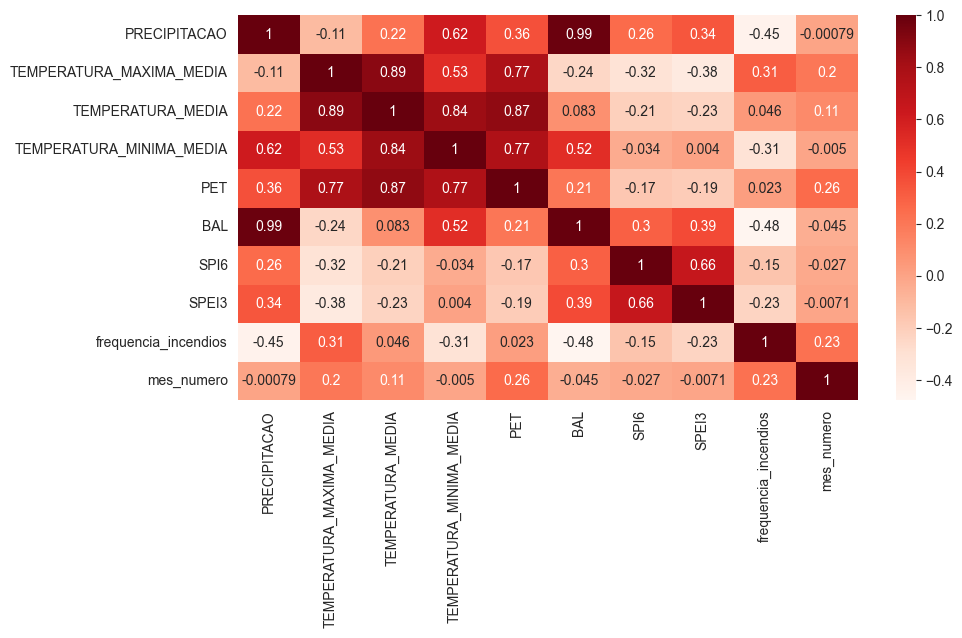

In [48]:
figure(figsize=(10,5))
sns.heatmap(df_final.corr(), annot = True, cmap="Reds")
plt.savefig('../../Documentação/CorrelacaoFinal', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
df_final = pd.get_dummies(df_final, columns = ['mes'])

In [50]:
cols =  ['PRECIPITACAO', 
         'SPEI3', 
         'TEMPERATURA_MAXIMA_MEDIA',
         'mes_Janeiro',
         'mes_Fevereiro',
         'mes_Março',
         'mes_Abril',
         'mes_Maio',
         'mes_Junho',
         'mes_Julho',
         'mes_Agosto',
         'mes_Setembro',
         'mes_Outubro',
         'mes_Novembro',
         'mes_Dezembro']
X = df_final.loc[:, cols].values
y = df_final.loc[:, 'frequencia_incendios'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 5.1 - Padronização das variáveis <a id="51"></a>

In [52]:
ss = StandardScaler()
X_stand_train = ss.fit_transform(X_train)
X_stand_test = ss.transform(X_test)
#joblib.dump(ss, '../Models/padronizacao')


# 5.2 - Linear Regression <a id="52"></a>

In [53]:
linear = LinearRegression()
linear.fit(X_stand_train, y_train)

y_pred = linear.predict(X_stand_test)
score_stand_linear = linear.score(X_stand_test, y_test)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 Linear Regression: {score_stand_linear:.2f}')
print(f'MSE: {mse_linear:.2f}')
print(f'RMSE: {rmse_linear:.2f}')

value_dezembro = np.array([233.0, 1.357870, 26.60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]).reshape(-1, 15)
value_agosto = np.array([0.0, -0.672021, 27.7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).reshape(-1, 15)

print(f'Previsão quantidade incêndios agosto: {linear.predict(ss.transform(value_agosto))[0]:.0f}')
print(f'Previsão quantidade incêndios dezembro: {linear.predict(ss.transform(value_dezembro))[0]:.0f}')

R2 Linear Regression: 0.64
MSE: 414.65
RMSE: 20.36
Previsão quantidade incêndios agosto: 67
Previsão quantidade incêndios dezembro: -8


# 5.3 - Random Forest <a id="53"></a>

In [54]:
regressor = RandomForestRegressor(bootstrap= True, 
                                  max_depth= 50, 
                                  max_features= 2, 
                                  min_samples_leaf= 2, 
                                  min_samples_split= 5, 
                                  n_estimators= 200)

regressor.fit(X_stand_train, y_train)
y_pred = regressor.predict(X_stand_test)

score_stand_ran = regressor.score(X_stand_test, y_test) 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

#Métricas
print(f'R2 Random Forest Regressor: {score_stand_ran:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R2 Random Forest Regressor: 0.71
MSE: 332.29
RMSE: 18.23


In [55]:
#Exporta e importa o modelo
#joblib.dump(regressor, '../Models/floresta_aleatoria')
#regressor = joblib.load('../Models/floresta_aleatoria')


In [56]:
value_dezembro = np.array([233.0, 1.357870, 26.60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]).reshape(-1, 15)
value_agosto = np.array([0.0, -0.672021, 27.7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).reshape(-1, 15)

print(f'Previsão quantidade incêndios agosto: {regressor.predict(ss.transform(value_agosto))[0]:.0f}')
print(f'Previsão quantidade incêndios dezembro: {regressor.predict(ss.transform(value_dezembro))[0]:.0f}')

Previsão quantidade incêndios agosto: 54
Previsão quantidade incêndios dezembro: 1


In [57]:
# n_arvore = 0

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=800)
# plot_tree(regressor.estimators_[n_arvore], 
#           feature_names=['PRECIPITACAO', 'SPEI3', 'TEMPERATURA_MAXIMA_MEDIA', 'TEMPERATURA_MINIMA_MEDIA', 'BAL', 'mes_numero'],
#           class_names=['frequencia_incendios'], 
#           filled=True, impurity=True, proportion = True, fontsize = 5,
#           rounded=False, max_depth = 3)
# plt.savefig(f'../Documentação/Modelo-Arvore-LongProf-Numero-{n_arvore}.png', dpi=300, bbox_inches='tight')

In [58]:
# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (40,25), dpi=900)
# for i in range(0, 5):
#     tree.plot_tree(
#         regressor.estimators_[i], 
#         feature_names=['PRECIPITACAO', 'SPEI3', 'TEMPERATURA_MAXIMA_MEDIA', 'TEMPERATURA_MINIMA_MEDIA', 'BAL', 'mes_numero'],
#           class_names=['frequencia_incendios'], 
#         filled=True, impurity=True, proportion = True, fontsize = 5,
#         rounded=False, max_depth = 3, ax = axes[i])

#     axes[index].set_title('Estimator: ' + str(i), fontsize = 20)
# fig.savefig('Modelo-Arvores-0-2.png')

# 5.4 - Rede Neural <a id="54"></a>

In [59]:
# Definindo o modelo de RNA com regularização L1 e L2
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), 
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(32, activation='relu', 
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
  tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

# Treinando o modelo
history = model.fit(X_stand_train, y_train, epochs=100, validation_data=(X_stand_test, y_test))

# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_stand_test)

# Calculando as métricas de desempenho
score_stand_nn = r2_score(y_test, y_pred)
mse_nn = mean_squared_error(y_test, y_pred)
rmse_nn = mean_squared_error(y_test, y_pred, squared=False)

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 1170.2435 - mse: 1165.7052 - mape: 39896268.0000 - val_loss: 1685.5789 - val_mse: 1681.1016 - val_mape: 42265984.0000
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1160.6500 - mse: 1156.2010 - mape: 87040824.0000 - val_loss: 1666.5774 - val_mse: 1662.1593 - val_mape: 109480192.0000
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1144.3142 - mse: 1139.9084 - mape: 182575808.0000 - val_loss: 1635.1956 - val_mse: 1630.8040 - val_mape: 210225760.0000
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1124.9436 - mse: 1120.5569 - mape: 342064640.0000 - val_loss: 1598.2112 - val_mse: 1593.8286 - val_mape: 332611680.0000
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1101.4609 - mse: 1097.0789 - mape: 520726880.0000 - val_loss: 1555.3619 - val_mse: 1550.9785 - val_mape: 455362080.0000
Epoch 6/100
8/8 [==============================

In [60]:
#Exporta e importa o modelo
#joblib.dump(model, '../Models/rede_neural1')
#model = joblib.load('../Models/rede_neural')


#import pickle
#pickle.dump(model, open('../Models/rede_neural1.pkl', 'wb'))
#model = pickle.load(open('../Models/rede_neural1.pkl', 'rb'))


from tensorflow.keras.models import load_model
model.save('nome_do_arquivo.h5')
model = load_model('nome_do_arquivo.h5')


In [61]:
value_dezembro = np.array([233.0, 1.357870, 26.60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]).reshape(-1, 15)
value_agosto = np.array([0.0, -0.672021, 27.7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).reshape(-1, 15)

print(f'R2 Neural Network Regression: {score_stand_nn:.2f}')
print(f'MSE: {mse_nn:.2f}')
print(f'RMSE: {rmse_nn:.2f}')
print(f'Previsão quantidade incêndios dezembro: {model.predict(ss.transform(value_dezembro))[0][0]:.0f}')
print(f'Previsão quantidade incêndios agosto: {model.predict(ss.transform(value_agosto))[0][0]:.0f}')

R2 Neural Network Regression: 0.74
MSE: 295.43
RMSE: 17.19
1/1 [==============================] - 0s 41ms/step
Previsão quantidade incêndios dezembro: 0
1/1 [==============================] - 0s 14ms/step
Previsão quantidade incêndios agosto: 74


<hr>

Victor Resende